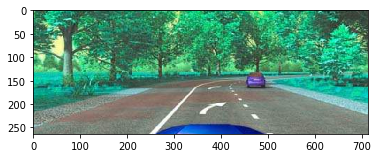

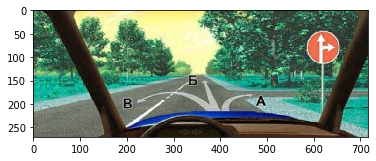

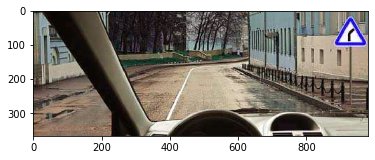

In [2]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from PIL import Image 

image1 = cv2.imread('1.png')
image2 = cv2.imread('3.png')
image3 = cv2.imread('4.png')
plt.imshow(image1)
plt.show()
plt.imshow(image2)
plt.show()
plt.imshow(image3)
plt.show()


In [3]:
PATH='.'
test_imgs = ['1.png','3.png','4.png','5.png','6.png','7.png','8.png']

In [4]:
images = [cv2.imread(image) for image in test_imgs]

In [5]:
def show(img):
    plt.imshow(img)
    plt.show()

In [6]:
def contrast_of_img(image1, brightness = -150, contrast = 150):
    img = np.int16(image1)
    img = img * (contrast/127+1) - contrast + brightness
    img = np.clip(img, 0, 255)
    img = np.uint8(img)
    #plt.imshow(img)
    #plt.show()
    return cv2.medianBlur(img,5)

In [7]:
beg_contrast_imgs = [contrast_of_img(image) for image in images]

In [8]:
contrast_imgs = [contrast_of_img(image, brightness = 150, contrast = 150) for image in beg_contrast_imgs]

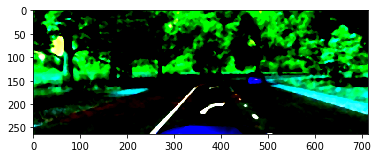

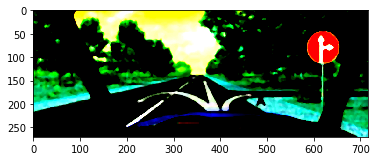

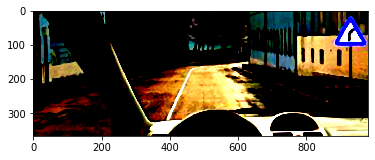

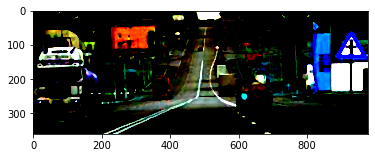

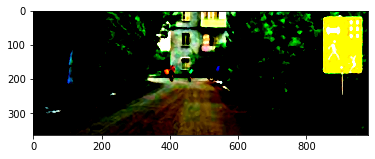

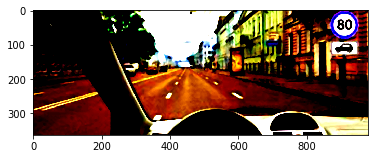

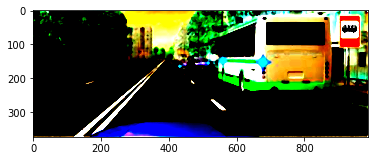

In [9]:
for im in contrast_imgs:
    show(im)


In [10]:
ims = [Image.fromarray(img) for img in contrast_imgs]

In [11]:
for i in range(len(ims)):
    ims[i].save("file"+str(i)+".png")

In [12]:
converted_ims = []
for i in range(len(ims)):
    image_file = Image.open("file"+str(i)+".png")
    image_file= image_file.convert('L')
    converted_ims.append(image_file)

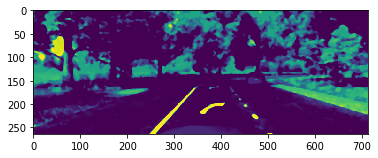

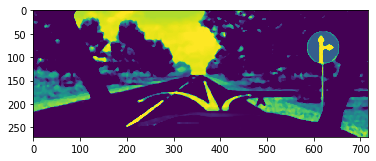

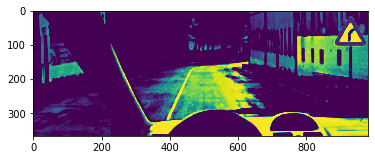

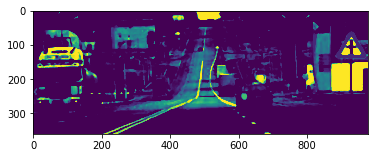

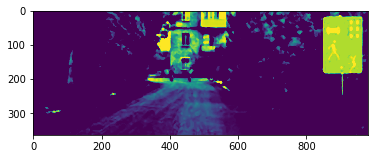

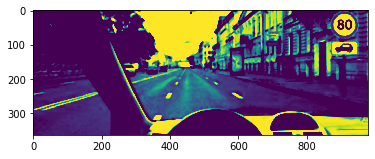

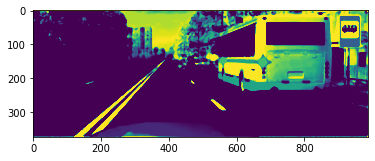

In [13]:
for im in converted_ims:
    show(im)

In [14]:
def proc(image_file):
    original = image_file

    width, height = original.size

    img = original.crop((0, int(height / 2), width, height))

    blur = cv2.GaussianBlur(np.float32(img),(5,5),0)

    gray_filtered = cv2.inRange(blur, 140, 255)
    return gray_filtered

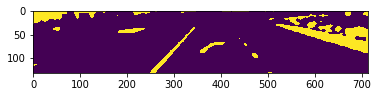

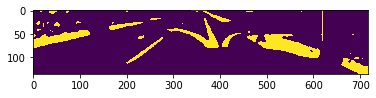

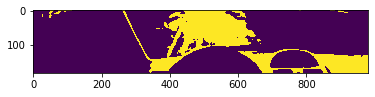

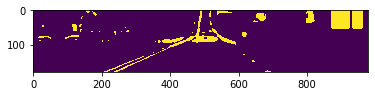

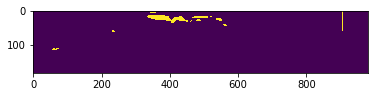

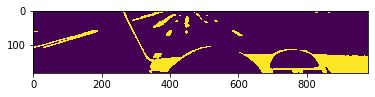

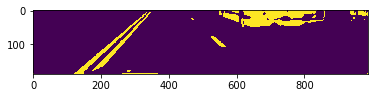

In [15]:
for im in converted_ims:
    show(proc(im))

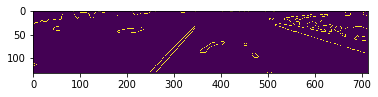

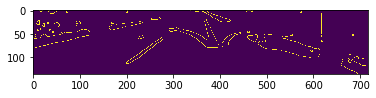

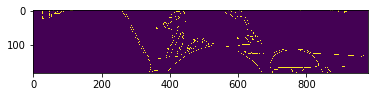

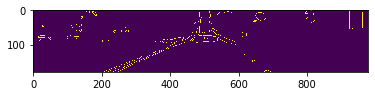

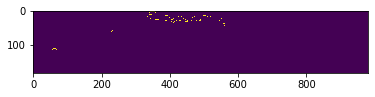

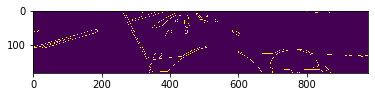

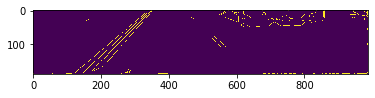

In [16]:
for im in converted_ims:
    edges = cv2.Canny(proc(im), 10, 200)
    show(edges)


In [18]:
import cv2
cropped=[]
for test in test_imgs:
    img = cv2.imread(test, 1)
    height, width = img.shape[:2] 
    crop_img = img[int(height / 2):height, 0:width]
    cropped.append(crop_img)

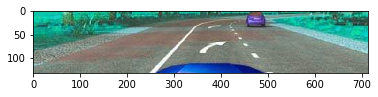

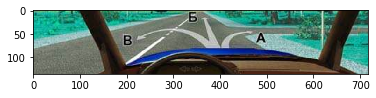

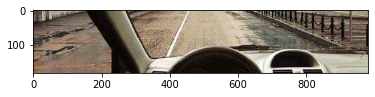

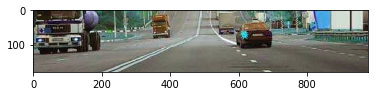

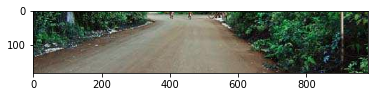

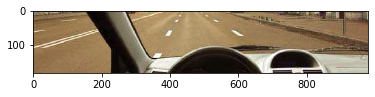

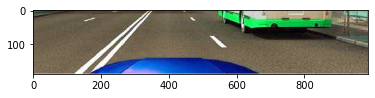

In [19]:
for i in cropped:
    show(i)

In [20]:
def draw_lines(index, converted_ims, cropped):
    edges = cv2.Canny(proc(converted_ims[index]), 10, 200)
    img = cropped[index]
    minLineLength = 1
    maxLineGap = 10
    height, width = img.shape[:2] 
    x_centr, y_centr = int(width/2), int(height/4)
    lines = cv2.HoughLinesP(edges,1,np.pi/180,15,minLineLength=minLineLength,maxLineGap=maxLineGap)
    for x in range(0, len(lines)):
        for x1,y1,x2,y2 in lines[x]:
            if (abs(x_centr-x1)<width/8+20 or abs(x_centr-x2)<width/8+20):
                cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
    minLineLength = 90
    maxLineGap = 10
    lines = cv2.HoughLinesP(edges,1,np.pi/180,15,minLineLength=minLineLength,maxLineGap=maxLineGap)
    for x in range(0, len(lines)):
        for x1,y1,x2,y2 in lines[x]:
            cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

    return img

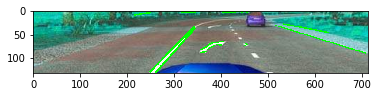

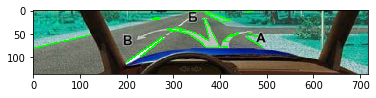

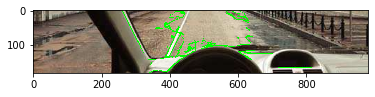

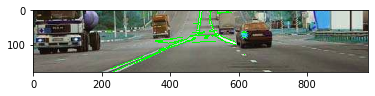

There are no road markings on 4 image


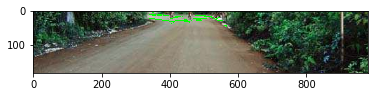

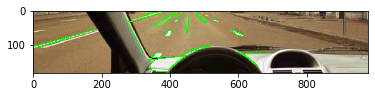

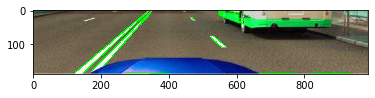

In [21]:
for i in range(len(converted_ims)):
    try:
        show(draw_lines(i, converted_ims, cropped))
    except:
        print("There are no road markings on",str(i),"image")
        show(cropped[i])